In [73]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial, floor, ceil

In [119]:
def partition_unique(n, d, min_val=1):
    """
    Generate all unique unordered partitions of n into d positive integers in non-decreasing order.

    Parameters:
        n (int): The integer to partition.
        d (int): The number of parts in the partition.
        min_val (int): The minimum value for the current part (to ensure non-decreasing order).

    Returns:
        List[List[int]]: A list of unique unordered partitions.
    """
    if d == 1:
        if n >= min_val:
            return [[n]]
        else:
            return []
    
    partitions = []
    for i in range(min_val, n - d + 2):  # Ensure enough remaining to fill the remaining parts
        for p in partition_unique(n - i, d - 1, i):
            partitions.append([i] + p)
    return partitions

def partition_sum(M, k):
    """
    Count the number of unique unordered partitions of M into k positive integers.

    Parameters:
        M (int): The integer to partition.
        k (int): The number of parts in the partition.

    Returns:
        int: The number of unique unordered partitions.
    """
    unique_partitions = partition_unique(M, k)
    return len(unique_partitions)

#Prob. of number of unique overlapping cliques
def unique_n_cliques(k, N_cliques, M):
    # Demand M > k
    if M < k:
        print("M < k")
        return None
    #And there must be more cliques left than nodes in one clique, and one is spend since we are using it, so N_cliques -1
    if N_cliques-1 < M:
        print("Too few cliques")
        return None
    return partition_sum(M,k)*factorial(M)/factorial(M+1-k)*factorial(N_cliques-1)/factorial(N_cliques-k)

#to normalize the above
def sum_prob(N_cliques, M):
    all_conf = 0
    for i in np.arange(1,M+1):
        all_conf += unique_n_cliques(i, N_cliques, M)
    return all_conf

#Prob of connecting to newly added clique (atleast one connection)
#def clique_connect()
"""
 lambda_edge: Freq. of poisson dist. of degrees (pos. float)
 N : Nodes in system (int)
 cut_off : cut off for sums that go to inf otherwise
"""

'\n lambda_edge: Freq. of poisson dist. of degrees (pos. float)\n N : Nodes in system (int)\n cut_off : cut off for sums that go to inf otherwise\n'

Text(0, 0.5, 'Prob.')

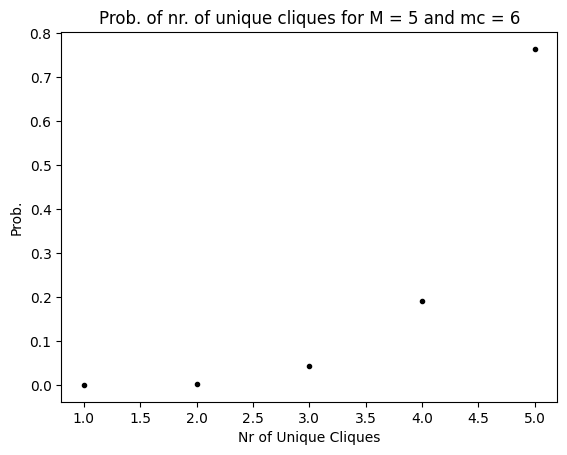

In [141]:
M = 5
nr_cliques = 6
normalizer = sum_prob(nr_cliques, M)
probs = [unique_n_cliques(i, nr_cliques, M)/normalizer for i in np.arange(1, M+1)]
plt.figure()
plt.plot(np.arange(1, M+1), probs,'k.')
plt.title("Prob. of nr. of unique cliques for M = 5 and mc = 6")
plt.xlabel("Nr of Unique Cliques")
plt.ylabel("Prob.")

Text(0, 0.5, 'Prob.')

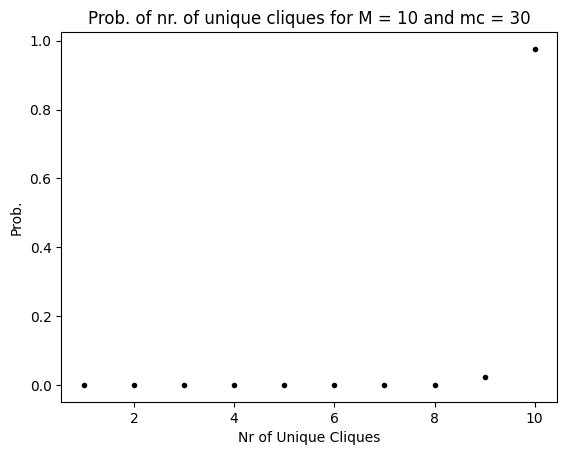

In [142]:
M = 10
nr_cliques = 30
normalizer = sum_prob(nr_cliques, M)
probs = [unique_n_cliques(i, nr_cliques, M)/normalizer for i in np.arange(1, M+1)]
plt.figure()
plt.plot(np.arange(1, M+1), probs,'k.')
plt.title("Prob. of nr. of unique cliques for M = 10 and mc = 30")
plt.xlabel("Nr of Unique Cliques")
plt.ylabel("Prob.")

Text(0, 0.5, 'Prob.')

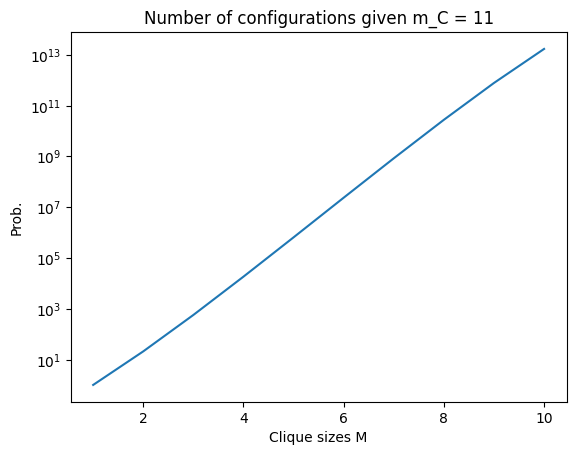

In [130]:
plt.figure()
plt.semilogy(np.arange(1, 11), [sum_prob(11, i) for i in np.arange(1, 11)])
plt.title("Number of configurations given m_C = 11")
plt.xlabel("Clique sizes M")
plt.ylabel("Prob.")

In [53]:
np.arange(0,5)

array([0, 1, 2, 3, 4])